# GHDP7031 Final Project
Author: Amber Ni

Date: 04/26/205

Course: Jobs, Worker and Development


## Introduction

The motherhood penalty refers to the economic disadvantages women face in the workplace as a result of becoming mothers. The motherhood penalty is a well-established concept with extensive literature documenting how working mothers often experience wage reductions, diminished perceived competence, and fewer career advancement opportunities compared to their childless counterparts.

Recent data from U.S. Department of Labor presents an interesting development. Four years after the sharp decline in maternal employment during the COVID-19 pandemic, statistics show that overall maternal employment has largely recovered, with some groups even surpassing pre-pandemic levels. This seemingly positive shift raises important questions about whether traditional patterns associated with the motherhood penalty still persist in the post-pandemic labor market. Motivated by these changes, I aim to explore the current relationship between motherhood, employment status, and working hours using 2023 data to assess whether mothers, particularly those with younger children, continue to face employment disadvantages compared to women without children in the U.S.

## Research Question

Do mothers, particularly those with younger children, work fewer hours or have lower employment rates compared to women without children in the U.S.?

## Data Source

I identified key variables relevant to this research question from the 2023 survey data and downloaded a customized dataset from IPUMS USA: https://usa.ipums.org/usa/.

This dataset include 27 variables and 146,133 observations.

Key variables include:

- `hourwage2`: hourly wage (rounded)
- `relate`: relationship to household head
- `age`: age
- `sex`: sex
- `race`: race
- `marst`: marital status
- `nchild`: number of own children in household
- `nchlt5`: number of own children under age 5 in household
- `yngch`: age of youngest own child in household
- `empstat`: employment status
- `labforce`: labor force status
- `uhrsworkt`: hours usually worked per week at all jobs
- `ahrsworkt`: hours worked last week
- `educ`: educational attainment recode
- `schlcoll`: school or college attendance

## Data Preparation & Cleaning


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/GHDP7031 - Spring 2025"

ls: cannot access '/content/drive/My Drive/GHDP7031 - Spring 2025': No such file or directory


In [ ]:
df = pd.read_stata("/content/drive/My Drive/GHDP7031-Spring-2025/cps_00002.dta")

In [ ]:
print(df.columns)

Index(['year', 'serial', 'month', 'cpsid', 'asecflag', 'asecwth', 'region',
       'statefip', 'pernum', 'cpsidv', 'cpsidp', 'asecwt', 'hourwage2',
       'relate', 'age', 'sex', 'race', 'marst', 'nchild', 'nchlt5', 'yngch',
       'empstat', 'labforce', 'uhrsworkt', 'ahrsworkt', 'educ', 'schlcoll'],
      dtype='object')


## Overview

### 1. Dependent Variable: Employment Status

I chose `empstat` - employment status as my dependent variable. As the dependent variable because it provides the most direct and fundamental measure of labor market participation. When analyzing the impact of young children on women's employment, the primary question is whether women remain in the workforce or exit due to caregiving responsibilities.

In contrast, variables like hours worked and wages only capture variations among those who are already employed, overlooking women who are unemployed. For example:

- Hours worked reflects work intensity but fails to account for women who are unemployed or have left the workforce altogether due to childcare demands.

- Wages are influenced by multiple factors beyond childcare—such as industry, education, experience, and discrimination—making it a less precise indicator for isolating the effect of young children.

By focusing on employment status (employed vs. not employed), this research captures the critical decision point: whether women with young children are able to stay employed at all. It allows for a clearer and more fundamental understanding of how childcare responsibilities correlate with women's participation in the labor market, regardless of job type, hours, or earnings.

In [ ]:
# Check labor force participation categories
# As employment status is conditional on being in the labor force,
# I first filtered the dataset to include only individuals participating in the labor force.
df['labforce'].value_counts()

,count
labforce,
"yes, in the labor force",71167
"no, not in the labor force",45018
niu,29948


In [ ]:
# Replace 'niu' values in 'labforce' column with NaN
df['labforce'] = df['labforce'].replace('niu', float('nan'))

<ipython-input-18-fa17f2e18d69>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['labforce'] = df['labforce'].replace('niu', float('nan'))


In [ ]:
# Filter the DataFrame to include only individuals in the labor force
df = df[df['labforce'] == 'yes, in the labor force']

In [ ]:
# Check employment status categorie
df['empstat'].value_counts()

,count
empstat,
at work,66156
"has job, not at work last week",2539
"unemployed, experienced worker",2292
"unemployed, new worker",180
niu,0
armed forces,0
"nilf, unable to work",0
"nilf, other",0
"nilf, retired",0


In [ ]:
# Define employment status
employment_map = {
    'at work': 1,
    'has job, not at work last week': 1,
    'unemployed, experienced worker': 0,
    'unemployed, new worker': 0,
}

# Create the new dummy variable 'employed' based on 'empstat'
# 1 = employed ; 0 = unemployed
df['empstat_recode'] = df['empstat'].map(employment_map)
df['empstat_recode'] = df['empstat_recode'].astype(int) # Ensure the data type is 'Int'

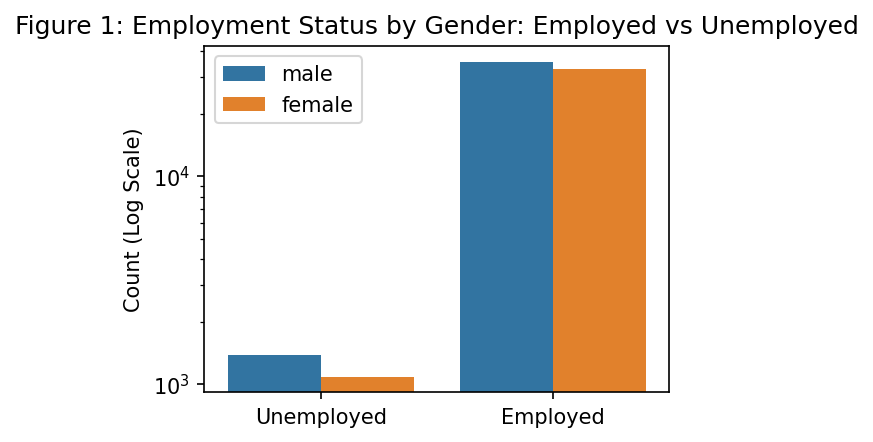

In [ ]:
# See the distribution of employment status by gender
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4, 3), dpi=150)

sns.countplot(data=df, x='empstat_recode', hue='sex')
plt.xticks([0,1], ['Unemployed', 'Employed'])
plt.title('Figure 1: Employment Status by Gender: Employed vs Unemployed')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
plt.xlabel('')
plt.legend(title='')
plt.show()

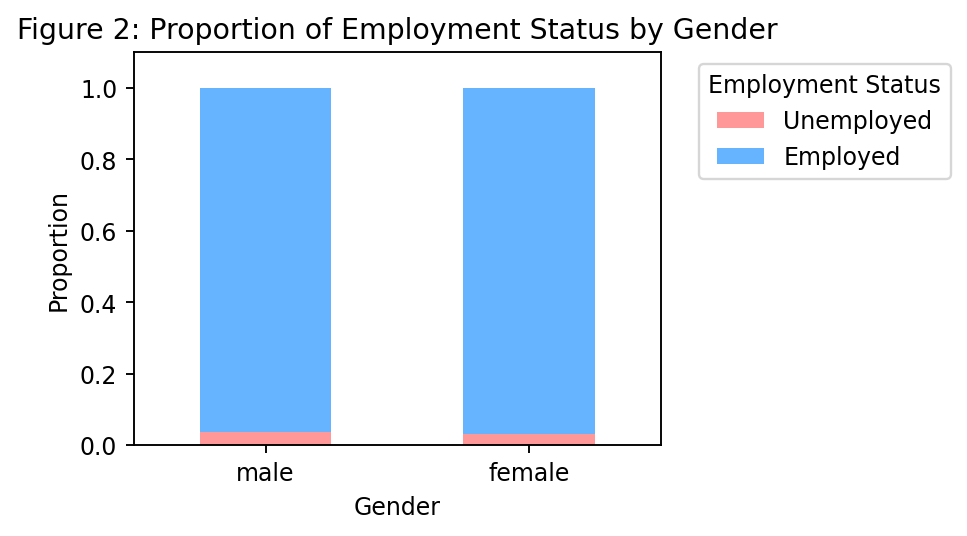

In [ ]:
import matplotlib.pyplot as plt



# Create a figure with dpi and fig size
fig, ax = plt.subplots(figsize=(4, 3), dpi=170)

# Create a stacked bar chart on ax
crosstab = pd.crosstab(df['sex'], df['empstat_recode'])
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_pct.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF'], ax=ax)

# Plot
plt.title('Figure 2: Proportion of Employment Status by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(['Unemployed', 'Employed'], title='Employment Status',
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)

plt.show()


**Both figures highlight that employment rates are consistently high for both genders, but males show a slightly higher unemployment count and proportion compared to females.** The absolute counts of employed and unemployed individuals by gender using a log scale shows that while the majority of both males and females are employed, males have a higher number of both unemployed and employed individuals than females (Figure 1). The proportion of employment status by gender reinforces that although employment rates exceed 95% for both genders, the proportion of unemployment is marginally higher among males than females. This suggests that overall women in this dataset are slightly more likely to be employed relative to men, without accounting for other factors (Figure 2).

### Main Variable of Interest: Number of Own Children under Age 5 in HH

I chose `nchlt5` as my main variable of interest because the number of own children under age 5 in the household serves as a strong indicator of potential exposure to the motherhood penalty. Young children typically require intensive care, and in the absence of sufficient societal or institutional childcare support, this responsibility disproportionately falls on mothers. This added burden can limit women's ability to participate fully in the labor market, leading to reduced employment opportunities, career interruptions, or shifts toward part-time or flexible work arrangements. By focusing on the presence of young children, this variable captures a key mechanism through which caregiving demands impact women's employment outcomes, making it highly relevant for analyzing the trade-offs working mothers face and the structural barriers contributing to gender disparities in the workforce.

In [ ]:
# Check nchlt5 categories
df['nchlt5'].value_counts()

,count
nchlt5,
no children under age 5,62025
1 child under age 5,6994
2,1930
3,204
4,11
5,3


In [ ]:
# Recode some values of nchlt5
df['nchlt5'] = df['nchlt5'].replace({
    'no children under age 5': 0,
    '1 child under age 5': 1,
})

# Condense some values
df['nchlt5_recode'] = df['nchlt5'].apply(lambda x: int(x) if int(x) <= 2 else '3+')


<ipython-input-25-fb0272aca531>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['nchlt5'] = df['nchlt5'].replace({


In [ ]:
# Crosstab nchlt5 and sex
pd.crosstab(df['nchlt5_recode'].astype(str), df['sex'])


sex,male,female
nchlt5_recode,,
0,32178,29847
1,3646,3348
2,1125,805
3+,133,85


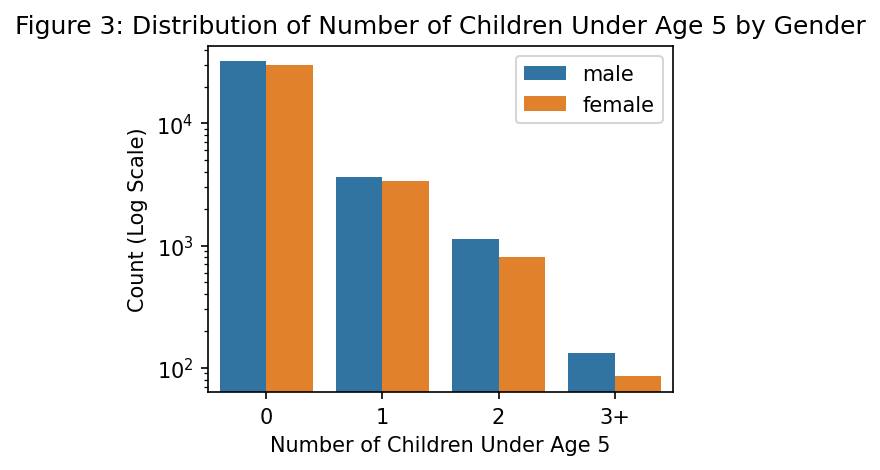

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(4, 3), dpi=150)

# Create a crosstab of nchlt5 and gender
crosstab = pd.crosstab(df['nchlt5_recode'].astype(str), df['sex']).reset_index()

# Convert to the long format
crosstab_long = crosstab.melt(id_vars='nchlt5_recode', var_name='Sex', value_name='Count')

# Create a bar chart by gender
sns.barplot(data=crosstab_long, x='nchlt5_recode', y='Count', hue='Sex')

plt.title('Figure 3: Distribution of Number of Children Under Age 5 by Gender')
plt.xlabel('Number of Children Under Age 5')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
plt.legend(title='')
plt.show()

In [ ]:
crosstab = pd.crosstab(df['sex'], df['nchlt5_recode'].astype(str))
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
print(crosstab_pct)


nchlt5_recode         0         1         2        3+
sex                                                  
male           0.867753  0.098323  0.030338  0.003587
female         0.875664  0.098225  0.023617  0.002494


**A clear gender difference emerges in the distribution of young children, with women slightly having less multiple children under age 5 in the household.** The majority of both males and females have no young children in the household with number of children under age 5 as 0, while the count sharply decreases as the number of young children increases. Notably, while the overall patterns for men and women are similar, females consistently show slightly lower counts across categories with different numbers of own children under age 5 (Figure 3).

However, this difference can be due to the existing smaller number of female presented in the dataset. To avoid mis-interpretation, I also checked the crosstab of sex and the number of children under age 5. Consistently, the vast majority of both males and females have no children under age 5, with proportions exceeding 86% for both genders. For those individuals with no children, the proportion of female is slightly higher. As the number of young children increases, the proportion decreases sharply, also aligning the Figure 3. Notably, women consistently exhibit slightly lower proportions in categories with multiple young children compared to men.

The observation that females in this dataset are less likely to have two or more young children, and more likely to have none, highlights a potential tendency for women to limit childbearing. This may be influenced by various job-related factors, such as employment pressures, career interruptions, and barriers like the glass ceiling, which can discourage women from having larger families while pursuing stable career development.

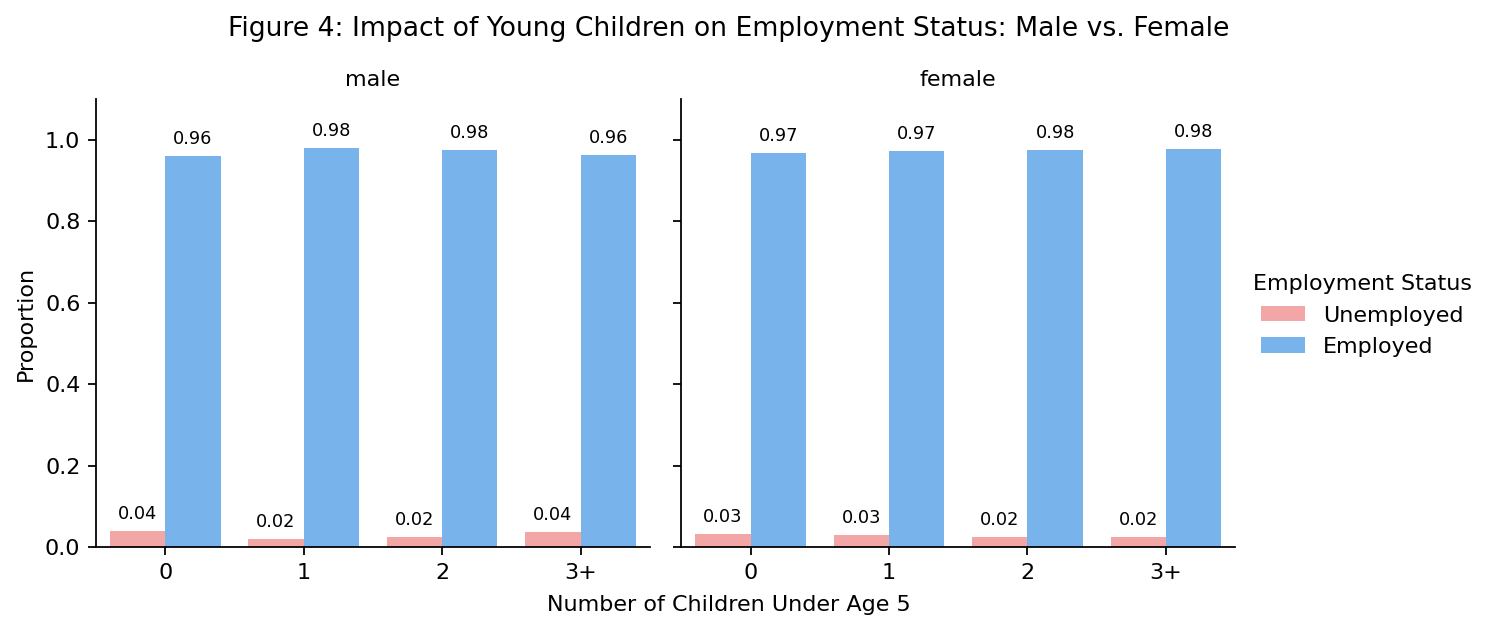

In [ ]:
# ------ See the relationship between employment status distribution and number of children under age 5 by gender

# Step 1: Prepare long-format data for FacetGrid
# Get crosstabs for both gender
crosstab1 = []

for gender in df['sex'].unique():
    temp = df[df['sex'] == gender]
    ctab = pd.crosstab(temp['nchlt5_recode'], temp['empstat_recode'])
    ctab_pct = ctab.div(ctab.sum(axis=1), axis=0)
    ctab_pct['sex'] = gender
    ctab_pct['nchlt5_recode'] = ctab_pct.index
    crosstab1.append(ctab_pct)

# Merfe two crosstabs
final_df = pd.concat(crosstab1)

# Change to long format
final_long = final_df.melt(id_vars=['sex', 'nchlt5_recode'],
                           value_vars=[0,1],
                           var_name='Employment Status',
                           value_name='Proportion')

# Step 2: Plot FacetGrid
g = sns.catplot(data=final_long, kind='bar',
                x='nchlt5_recode', y='Proportion',
                hue='Employment Status', col='sex',
                palette=['#FF9999', '#66B3FF'],
                height=4, aspect=1)

g.figure.set_dpi(160)

g.set_axis_labels("", "Proportion")
plt.subplots_adjust(top=0.85, bottom=0.15)
# plt.figure(figsize=(4, 3), dpi=300)
plt.figtext(0.5, 0.05, 'Number of Children Under Age 5', ha='center', fontsize=10)
g.set_titles("{col_name}")
g.set(ylim=(0, 1.1))
g._legend.set_title('Employment Status')
new_labels = ['Unemployed', 'Employed']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.set_xticklabels(rotation=0)

import numpy as np
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height) and height > 0.005:
            ax.text(p.get_x() + p.get_width() / 2., height + 0.02,
                    f'{height:.2f}', ha="center", va="bottom", fontsize=8)

plt.suptitle('Figure 4: Impact of Young Children on Employment Status: Male vs. Female')
plt.show()




After descriptively examining both the overall employment status and the distribution of young children by gender, a seemingly contradictory pattern emerges — have women already gained a competitive edge in employment, or do they still face challenges balancing childbearing with labor market participation? These observations raise important questions about the true dynamics at play. To explore this further, I examined the relationship between the number of young children and employment rates by gender.

**Increasing childcaring responsibilities appear to motivate both men and women to seek employment, but while men face limits when the burden becomes too large, women are consistently driven into the workforce.**

For males, employment proportions remain stable overall, but a nuanced trend emerges. As the number of young children increases from 0 to 1 or 2, unemployment slightly decreases, suggesting that additional childcaring responsibilities may encourage men to seek more employment opportunities to support household needs. However, when the number of young children reaches 3 or more, the growing caregiving burden may begin to limit men’s ability to stay employed, reflecting potential constraints in balancing large family demands with work (Figure 4, right).

For females, unemployment consistently decreases as the number of young children rises, even when reaching 3 or more. This pattern indicates that, rather than deterring women from the workforce, the presence of young children may motivate them to pursue employment opportunities to contribute additional income to the household. Contrary to traditional assumptions about childcare limiting women's labor force participation, this suggests a potential economic necessity driving mothers into the job market despite increasing family responsibilities (Figure 4, left).

### Control Variables

I selected region (`region`), age (`age`), race (`race`), marital status (`marst`), and educational attainment (`educ`) as control variables, focusing on recoding and consolidating categories in this section to for more effective analysis.

#### Region


In [ ]:
# Check region categories
print(df.region.value_counts())

region
south atlantic division        13192
pacific division               11524
mountain division               8961
west south central division     8374
east north central division     7188
west north central division     6424
middle atlantic division        5987
new england division            5212
east south central division     4305
Name: count, dtype: int64


In [ ]:
# Redefine regions
region_map = {
    'pacific division': 'West',
    'mountain division': 'West',
    'west north central division': 'North',
    'east north central division': 'North',
    'west south central division': 'South',
    'east south central division': 'South',
    'south atlantic division': 'South',
    'middle atlantic division': 'Northeast',
    'new england division': 'Northeast'
}

# Create a new variable for recoded regions
df['region_recode'] = df['region'].replace(region_map)


<ipython-input-31-c595949a7ce7>:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['region_recode'] = df['region'].replace(region_map)


In [ ]:
# See recoded region
print(df.region_recode.value_counts())

region_recode
South        25871
West         20485
North        13612
Northeast    11199
Name: count, dtype: int64


#### Age

In [ ]:
# Check age categories
print(df.age.value_counts())

age
40              1833
38              1733
41              1704
37              1697
42              1695
                ... 
6                  0
2                  0
1                  0
under 1 year       0
9                  0
Name: count, Length: 82, dtype: int64


In [ ]:
# Change non-numeric values to missing
df['age_numeric'] = pd.to_numeric(df['age'], errors='coerce')

# Categorize age groups
bins = [0, 29, 49, 85]
labels = ['<=29', '30-49', '50+']

df['age_group'] = pd.cut(df['age_numeric'], bins=bins, labels=labels, right=True)

# Check categories again
print(df['age_group'].value_counts())



age_group
30-49    32583
50+      23216
<=29     15368
Name: count, dtype: int64


#### Race

In [ ]:
# Check race categories
print(df['race'].value_counts())

race
white                                                    54827
black                                                     8053
asian only                                                5263
american indian/aleut/eskimo                               935
white-american indian                                      484
hawaiian/pacific islander only                             430
white-black                                                429
white-asian                                                347
black-american indian                                       72
white-hawaiian/pacific islander                             70
asian-hawaiian/pacific islander                             63
white-asian-hawaiian/pacific islander                       63
white-black-american indian                                 48
black-asian                                                 19
white-black-asian                                           12
american indian-asian                             

In [ ]:
# Recode race
def recode_race(race):
    race_lower = race.lower()
    if race_lower == 'white':
        return 'White'
    elif 'black' in race_lower and '-' not in race_lower:
        return 'Black or African American'
    elif 'asian' in race_lower and '-' not in race_lower:
        return 'Asian'
    elif ('american indian' in race_lower) or ('aleut' in race_lower) or ('eskimo' in race_lower) or ('hawaiian' in race_lower) or ('pacific islander' in race_lower):
        return 'Indigenous/Native Populations'
    else:
        return 'Other'

df['race_recode'] = df['race'].apply(recode_race)

# See recoded race
print(df['race_recode'].value_counts())



race_recode
White                            54827
Black or African American         8053
Asian                             5263
Indigenous/Native Populations     2206
Other                              818
Name: count, dtype: int64


#### Marital Status

In [ ]:
print(df['marst'].value_counts())

marst
married, spouse present    38526
never married/single       22466
divorced                    6601
separated                   1270
widowed                     1267
married, spouse absent      1037
Name: count, dtype: int64


In [ ]:
# Recode marital status
# Define mapping rules with numeric codes
marital_map = {
    'married, spouse present': 1,   # Married -> 1
    'married, spouse absent': 0,    # Single -> 0
    'never married/single': 0,
    'divorced': 0,
    'separated': 0,
    'widowed': 0
}

# Apply mapping
df['marst_recode'] = df['marst'].map(marital_map)

# Check result
print(df['marst_recode'].value_counts())


marst_recode
1    38526
0    32641
Name: count, dtype: int64


In [ ]:
# See recoded marital status
print(df['marst_recode'].value_counts())

marst_recode
1    38526
0    32641
Name: count, dtype: int64


#### Educational Attainment

In [ ]:
# Check educational attainment
print(df['educ'].value_counts())

educ
high school diploma or equivalent                      18662
bachelor's degree                                      17339
some college but no degree                             10589
master's degree                                         7987
associate's degree, academic program                    4297
associate's degree, occupational/vocational program     3149
doctorate degree                                        1677
grade 11                                                1542
professional school degree                              1147
grade 10                                                1121
12th grade, no diploma                                   943
grade 9                                                  901
grades 7 or 8                                            742
grades 5 or 6                                            712
grades 1, 2, 3, or 4                                     261
none or preschool                                         98
niu or blank       

In [ ]:
# Recode educational attainment
def recode_educ(x):
    if x in ['none or preschool', 'grades 1, 2, 3, or 4', 'grades 5 or 6', 'grades 7 or 8',
             'grade 9', 'grade 10', 'grade 11', '12th grade, no diploma', 'high school diploma or equivalent']:
        return 'High School or Below'
    elif x in ['some college but no degree', "associate's degree, academic program",
               "associate's degree, occupational/vocational program"]:
        return 'Some College'
    else:
        return 'Bachelor or Above'

df['educ_recode'] = df['educ'].apply(recode_educ)


In [ ]:
# See recoded educational attainment
print(df['educ_recode'].value_counts())


educ_recode
Bachelor or Above       28150
High School or Below    24982
Some College            18035
Name: count, dtype: int64


## Analysis

Based on Figure 4, it appears that the presence of young children may motivate women to pursue employment opportunities rather than limit their participation in the labor market. But is this truly the case for all women? Do females across different regions, age groups, and ethnicities exhibit the same pattern, or do these factors reveal variations in how young children impact women's employment?

In this section, I focus on the impact of young children on female employment across different ethnic groups, age groups, regions, marital statuses, and levels of educational attainment.

After subsetting my dataset with only female in the labor force, I begin by descriptively exploring how each of these factors may shape the influence of young children on women's employment through visualizations. Following this, I run a logistic regression model to examine the relationship between the number of young children and employment outcomes (measured by the probability of being employed), while controlling for region, age, race, marital status, and educational attainment.

In [ ]:
# Subset dataset with only female in labor force
df_female = df[(df['sex'] == 'female')]

### Race

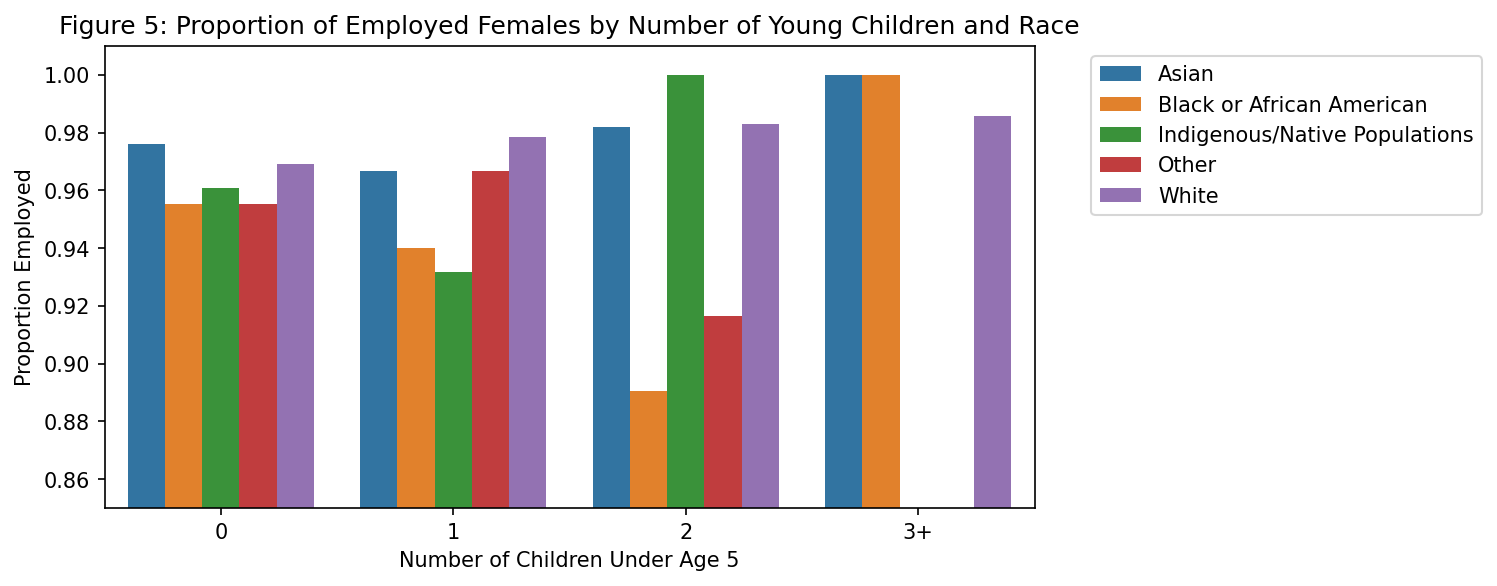

In [ ]:
# Step 1: Calculate the employment ratio under each race and the number of children
# First, make a total count of the number of people
total_counts = df_female.groupby(['nchlt5_recode', 'race_recode']).size().reset_index(name='Total')

# Count the number of employed people again
employed_counts = df_female[df_female['empstat_recode'] == 1].groupby(['nchlt5_recode', 'race_recode']).size().reset_index(name='Employed')

# Merge the two tables and calculate the proportion
merged = pd.merge(total_counts, employed_counts, on=['nchlt5_recode', 'race_recode'], how='left')
merged['Employed'] = merged['Employed'].fillna(0)
merged['Proportion'] = merged['Employed'] / merged['Total']

# Step 2: Plot
plt.figure(figsize=(8,4), dpi=150)
sns.barplot(
    data=merged,
    x='nchlt5_recode',
    y='Proportion',
    hue='race_recode'
)

plt.title('Figure 5: Proportion of Employed Females by Number of Young Children and Race')
plt.xlabel('Number of Children Under Age 5')
plt.ylabel('Proportion Employed')
plt.ylim(0.85, 1.01)
plt.legend(title='',
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Asian and white women generally exhibit high employment rates, but key differences emerge as the number of young children increases.** For example, Indigenous/Native and Black or African American women both experience a notable increase in employment at the two-child or 3+ child level. White women show a clear upward trend in employment as the number of young children increases, indicating greater workforce attachment even with more children. In contrast, Asian women experience a dip in employment with one child but recover at higher child counts.

This pattern may suggest that structural or support-related barriers disproportionately affect Black and Indigenous/Native mothers, driving them to seek employment even with heavy childcaring buderns. The rebound in employment seen among Asian also indicates economic necessity overriding caregiving constraints.

### Marital Status

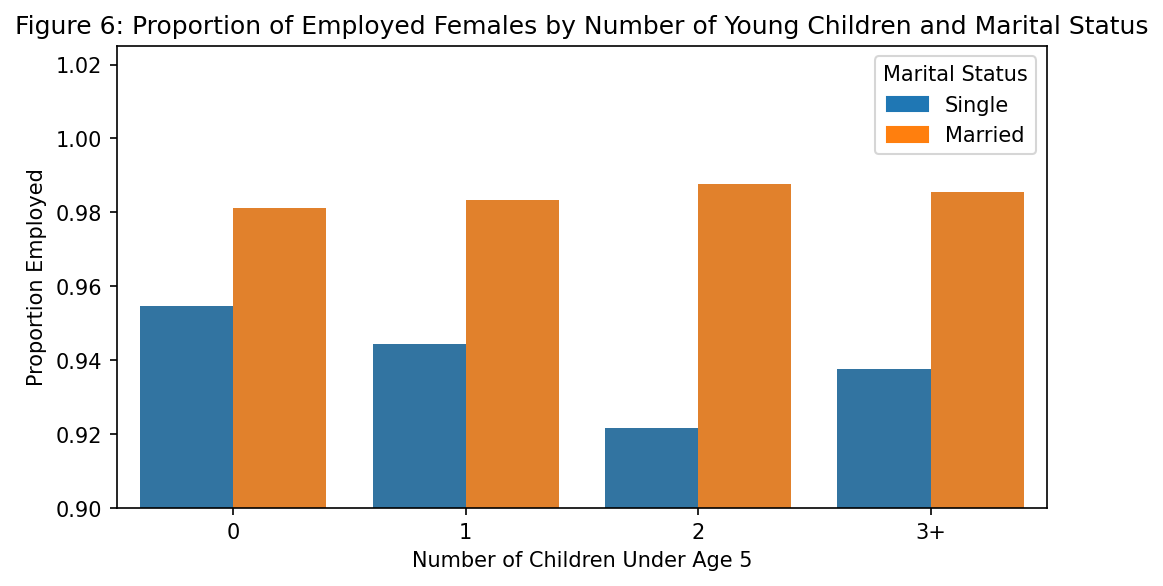

In [ ]:
import matplotlib.patches as mpatches

# First, make a total count of the number of people
total_counts = df_female.groupby(['nchlt5_recode', 'marst_recode']).size().reset_index(name='Total')

# Count the number of employed people again
employed_counts = df_female[df_female['empstat_recode'] == 1].groupby(['nchlt5_recode', 'marst_recode']).size().reset_index(name='Employed')

# Merge the two tables and calculate the proportion
merged = pd.merge(total_counts, employed_counts, on=['nchlt5_recode', 'marst_recode'], how='left')
merged['Employed'] = merged['Employed'].fillna(0)
merged['Proportion'] = merged['Employed'] / merged['Total']

# Plot
plt.figure(figsize=(8,4), dpi=150)

barplot = sns.barplot(
    data=merged,
    x='nchlt5_recode',
    y='Proportion',
    hue='marst_recode',
    palette=['#1f77b4', '#ff7f0e']
)

# Customize legend
handles = [
    mpatches.Patch(color='#1f77b4', label='Single'),
    mpatches.Patch(color='#ff7f0e', label='Married')
]
plt.legend(handles=handles, title='Marital Status')

plt.title('Figure 6: Proportion of Employed Females by Number of Young Children and Marital Status')
plt.xlabel('Number of Children Under Age 5')
plt.ylabel('Proportion Employed')
plt.ylim(0.9, 1.025)
plt.show()


**Marital status significantly shapes how women balance employment and childcare, with married women maintaining higher job stability than single women as caregiving demands for young children increase.** Overall, married women consistently show higher employment rates compared to single women across all categories of young children. For married females, employment proportions remain stable and high, even as the number of young children increases. There is only a slight decrease in employment rate when the number of young children reaches 3 or more. In contrast, single women exhibit a noticeable decline in employment proportion as the number of young children rises. Ther is an increase in employment rate when the number of young children reaches 3 or more (Figure 6).

This reverse trend highlights the critical role of marital status in shaping women’s employment amid childcare duties. Married women maintain high, stable employment rates, likely due to greater household and caregiving support. In contrast, single women face greater declines as childcare demands grow, reflecting the challenges of balancing work without spousal support. The slight rebound in employment for single mothers with 3+ young children suggests economic necessity drives workforce participation despite heavy caregiving burdens, which is also an indicator for gaps in social safety nets for single-parent households.

### Age

<ipython-input-46-cff13b6b4346>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['nchlt5_recode'] = df_female['nchlt5_recode'].astype(str)
<ipython-input-46-cff13b6b4346>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['age_group'] = df_female['age_group'].astype(str)


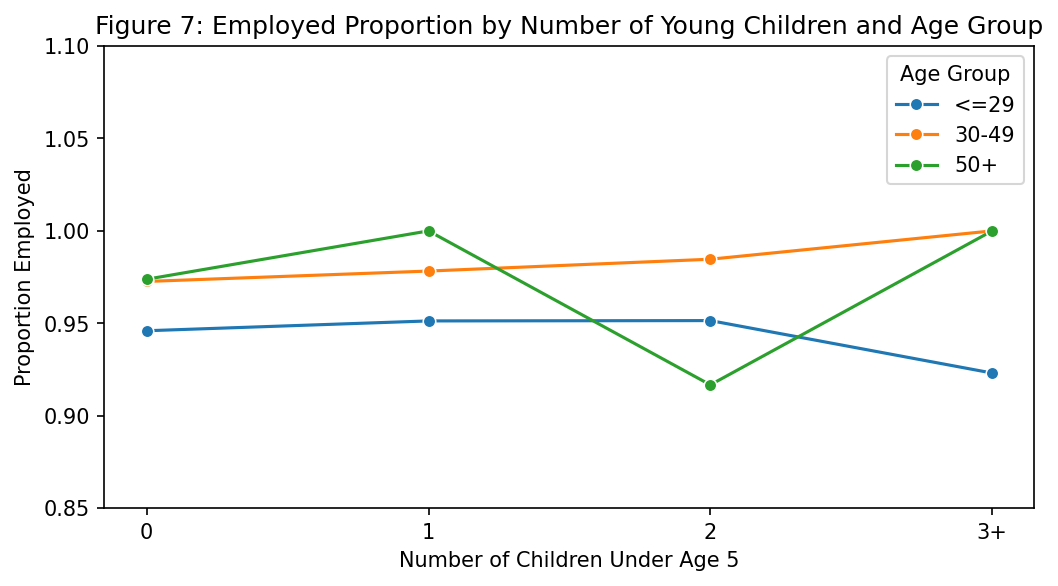

In [ ]:
# Ensure the consistency of data types
df_female['nchlt5_recode'] = df_female['nchlt5_recode'].astype(str)
df_female['age_group'] = df_female['age_group'].astype(str)

# Count the total number of people
total_counts = df_female.groupby(['age_group', 'nchlt5_recode'], observed=False).size().reset_index(name='Total')

# Count the number of employed people
employed_counts = df_female[df_female['empstat_recode'] == 1].groupby(['age_group', 'nchlt5_recode'], observed=False).size().reset_index(name='Employed')

# Merge and calculate the proportion
merged = pd.merge(total_counts, employed_counts, on=['age_group', 'nchlt5_recode'], how='left')
merged['Employed'] = merged['Employed'].fillna(0)
merged['Proportion'] = merged['Employed'] / merged['Total']

# Ensure order is right
merged['age_group'] = pd.Categorical(merged['age_group'], categories=['<=29', '30-49', '50+'], ordered=True)
merged['nchlt5_recode'] = pd.Categorical(merged['nchlt5_recode'], categories=['0', '1', '2', '3+'], ordered=True)

# Plot
plt.figure(figsize=(8,4), dpi=150)
sns.lineplot(
    data=merged,
    x='nchlt5_recode',
    y='Proportion',
    hue='age_group',
    marker='o'
)

plt.title('Figure 7: Employed Proportion by Number of Young Children and Age Group')
plt.xlabel('Number of Children Under Age 5')
plt.ylabel('Proportion Employed')
plt.ylim(0.85, 1.1)
plt.legend(title='Age Group')
plt.show()


**Age influences how women manage employment alongside childcare, with middle-aged women (30-49) showing the greatest employment stability as caregiving demands for young children increase.** Overall, women aged 30-49 maintain the highest and most stable employment rates across all categories of young children, even as the number of children rises. In contrast, younger women (≤29) exhibit consistently lower employment proportions, with a slight decline when they have 3 or more young children. Women aged 50+ show more fluctuation, experiencing a noticeable drop in employment with two young children, but a sharp rebound when the number reaches 3+ (Figure 7).

This pattern highlights how different life stage affect women’s ability to balance work and childcare. Middle-aged women likely benefit from more established careers and resources, enabling them to sustain employment despite increased childcare responsibilities. Younger women may face early-career instability compounded by childcare demands, limiting their workforce participation. The volatility seen among women aged 50+ could reflect diverse circumstances.

### Region

<ipython-input-53-442e6b045a01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['nchlt5_recode'] = df_female['nchlt5_recode'].astype(str)
<ipython-input-53-442e6b045a01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['region_recode'] = df_female['region_recode'].astype(str)


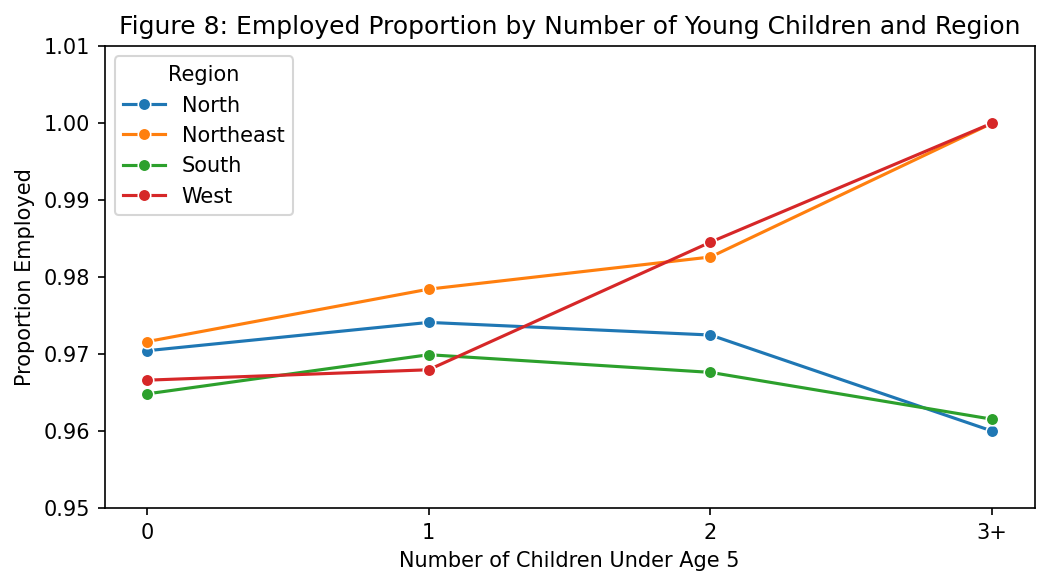

In [ ]:
# Ensure the consistency of data types
df_female['nchlt5_recode'] = df_female['nchlt5_recode'].astype(str)
df_female['region_recode'] = df_female['region_recode'].astype(str)

# Count the total number of people
total_counts = df_female.groupby(['region_recode', 'nchlt5_recode'], observed=False).size().reset_index(name='Total')

# Count the number of employed people
employed_counts = df_female[df_female['empstat_recode'] == 1].groupby(['region_recode', 'nchlt5_recode'], observed=False).size().reset_index(name='Employed')

# Merge and calculate the proportion
merged = pd.merge(total_counts, employed_counts, on=['region_recode', 'nchlt5_recode'], how='left')
merged['Employed'] = merged['Employed'].fillna(0)
merged['Proportion'] = merged['Employed'] / merged['Total']

# Ensure order is right
merged['nchlt5_recode'] = pd.Categorical(merged['nchlt5_recode'], categories=['0', '1', '2', '3+'], ordered=True)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=150)
sns.lineplot(
    data=merged,
    x='nchlt5_recode',
    y='Proportion',
    hue='region_recode',
    marker='o'
)

plt.title('Figure 8: Employed Proportion by Number of Young Children and Region')
plt.xlabel('Number of Children Under Age 5')
plt.ylabel('Proportion Employed')
plt.ylim(0.95, 1.01)
plt.legend(title='Region')
plt.show()


**Regional differences significantly influence how young children impact female employment, with Northeast and West regions showing greater resilience in employment rates as caregiving demands increase.** Overall, women in the Northeast and West maintain higher employment proportions, especially as the number of young children rises, even reaching 100% employment when they have 3 or more young children. Notably, the Northeast shows a steady increase in employment rates, while the West displays a much steeper rise. This sharp climb in the West may be attributed to its fast-growing high-tech industries and higher living costs, where having more than two young children likely compels both parents to participate in the workforce to sustain the household. Additionally, the prevalence of higher-paying jobs in the West may offer more incentives or opportunities for women to remain employed despite increasing childcare responsibilities (Figure 7).

This trend highlights the critical role of regional economic conditions, social policies, and childcare infrastructure in supporting working mothers. The strong employment retention in the Northeast and West may reflect better access to childcare services, more flexible labor markets, or cultural norms that encourage female workforce participation despite family burdens. Conversely, the declining pattern in the North and South suggests that women in these regions face greater structural barriers, such as limited childcare support or fewer accommodating job opportunities, making it harder to balance employment with increasing caregiving demands.

### Educational Attainment

<ipython-input-54-7431555b92fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['nchlt5_recode'] = df_female['nchlt5_recode'].astype(str)
<ipython-input-54-7431555b92fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['educ_recode'] = df_female['educ_recode'].astype(str)


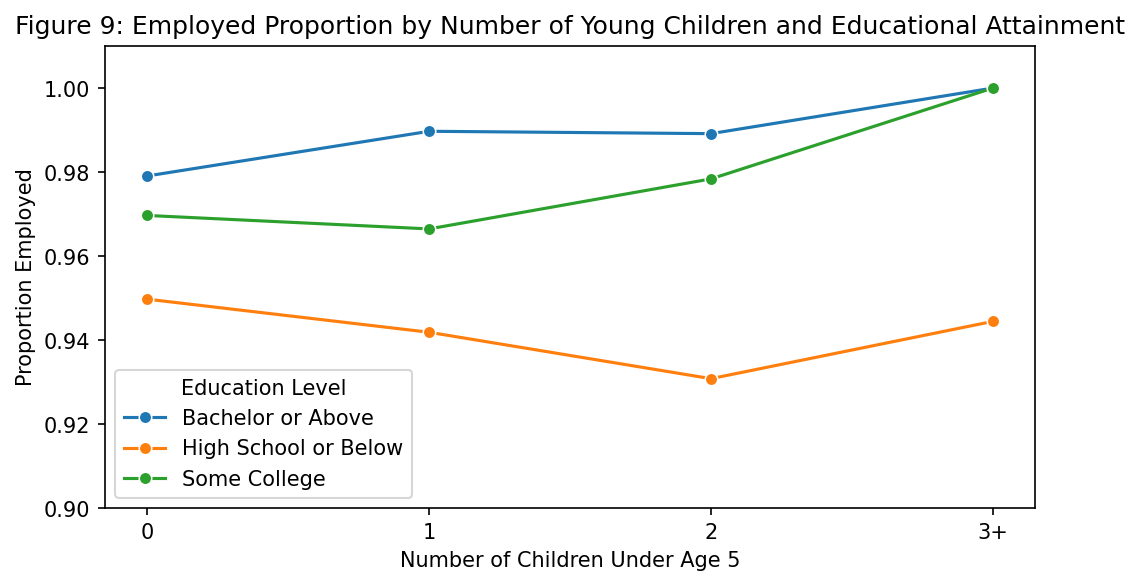

In [ ]:
# Ensure the consistency of data types
df_female['nchlt5_recode'] = df_female['nchlt5_recode'].astype(str)
df_female['educ_recode'] = df_female['educ_recode'].astype(str)

# Count the total number of people
total_counts = df_female.groupby(['educ_recode', 'nchlt5_recode'], observed=False).size().reset_index(name='Total')

# Count the number of employed people
employed_counts = df_female[df_female['empstat_recode'] == 1].groupby(['educ_recode', 'nchlt5_recode'], observed=False).size().reset_index(name='Employed')

# Merge and calculate the proportion
merged = pd.merge(total_counts, employed_counts, on=['educ_recode', 'nchlt5_recode'], how='left')
merged['Employed'] = merged['Employed'].fillna(0)
merged['Proportion'] = merged['Employed'] / merged['Total']

# Ensure order is right
merged['nchlt5_recode'] = pd.Categorical(merged['nchlt5_recode'], categories=['0', '1', '2', '3+'], ordered=True)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=150)
sns.lineplot(
    data=merged,
    x='nchlt5_recode',
    y='Proportion',
    hue='educ_recode',
    marker='o'
)

plt.title('Figure 9: Employed Proportion by Number of Young Children and Educational Attainment')
plt.xlabel('Number of Children Under Age 5')
plt.ylabel('Proportion Employed')
plt.ylim(0.90, 1.01)
plt.legend(title='Education Level')
plt.show()


**Higher education levels are correlated with more employment as caregiving demands for young children increase.** Overall, women with a bachelor’s degree or higher consistently show the highest employment rates across all categories of young children, maintaining stable and slightly rising employment proportions even as the number of young children increases. Women with some college education also demonstrate resilience, with employment rates improving notably when they have 3 or more young children. In contrast, women with a high school education or below experience a gradual decline in employment rates as the number of young children rises. (Figure 9).

This trend shows that higher education can help women stay employed even as childcare responsibilities grow. Women with advanced education may have access to more stable jobs, better pay, and flexible work options, making it easier to balance work and family life. On the other hand, women with lower education levels might struggle with fewer job opportunities and less workplace support, which can make it difficult to keep working when childcare demands increase. But the slight rise in employment for those with 3 or more children suggests that financial pressure may push them all back into the workforce, even when balancing work and childcare is challenging.

### Regression Analysis

In [ ]:
import statsmodels.formula.api as smf

# Tell the model that these variables are all categorical by using c()

logit_model = smf.logit(
    'empstat_recode ~ C(nchlt5_recode) + C(educ_recode) + C(race_recode, Treatment(reference="White")) + C(age_group) + C(region_recode) + C(marst_recode)',
    data=df
).fit()

# Print regression result
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.143670
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         empstat_recode   No. Observations:                71167
Model:                          Logit   Df Residuals:                    71151
Method:                           MLE   Df Model:                           15
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                 0.04750
Time:                        20:23:47   Log-Likelihood:                -10225.
converged:                       True   LL-Null:                       -10734.
Covariance Type:            nonrobust   LLR p-value:                7.700e-208
                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------

In [ ]:
from statsmodels.iolib.summary2 import summary_col

# Create a regression table to present the regression result in a more tidy way
tidy_summary = summary_col([logit_model], stars=True, float_format='%0.3f')
print(tidy_summary)



                                                                              empstat_recode
--------------------------------------------------------------------------------------------
Intercept                                                                     3.266***      
                                                                              (0.074)       
C(nchlt5_recode)[T.1]                                                         0.213**       
                                                                              (0.083)       
C(nchlt5_recode)[T.2]                                                         0.106         
                                                                              (0.152)       
C(nchlt5_recode)[T.3+]                                                        -0.037        
                                                                              (0.388)       
C(educ_recode)[T.High School or Below]                               

#### Regression Results

The logistic regression analysis reveals several significant factors related to female employment probability:

- **Young Children (Number of own children under age 5 in HH)**: Having one child under age 5 is correlated with a 21% higher probability of being employed compared to having no young children, suggesting a potential link between childcare responsibilities and increased labor force participation for women with a single child. As the number of young children increases, the coefficients become statistically insignificant.

- **Educational Attainment**: Education is strongly associated with employment outcomes. Women with a high school diploma or below are linked to an 88% lower probability of being employed compared to college graduates, while those with some college education are associated with a 40% lower probability. This indicates that higher educational attainment is related to better employment prospects for women.

- **Race**: Clear racial disparities emerge. Being Black or African American is associated with a 43% lower probability of employment, and being Indigenous/Native is linked to a 30% lower probability compared to White women, reflecting ongoing racial inequalities in labor market participation.

- **Age**: Age is positively correlated with employment probability. Women aged 30-49 are associated with a 31% higher probability of being employed compared to those under 29, while women aged 50+ are linked to a 47% higher probability, suggesting greater workforce attachment in older age groups.

- **Region**: Women in the South are associated with a 12% higher probability of employment compared to those in the Northeast. This contrasts with earlier visual trends and may reflect regional labor market characteristics not fully captured in descriptive analysis.

- **Marital Status**: Being married is correlated with a 65% higher probability of employment compared to being single, consistent with visual patterns suggesting that marital status is linked to greater workforce participation, possibly due to household or financial dynamics.



## Conclusion & Policy Recommendation

While there are promising signs that having young children may encourage women to participate in the labor force, the effects vary significantly across different demographic groups. These disparities highlight the need for targeted policy interventions to ensure equitable support for women facing childcare especially for young children and employment challenges.

**Policy Recommendation**:

- **Expand affordable childcare support**:
Since having one young child is linked to higher employment probabilities, but the effect diminishes with multiple young children, expanding access to affordable childcare is essential. Public subsidies, employer-supported childcare, and extended early childhood education programs can help reduce caregiving burdens and sustain women's participation in the labor force.

- **Enhance educational opportunities for women**:
The strong negative correlation between low educational attainment and employment reinforces the importance of increasing access to education. Policies should focus on adult education, vocational training, and re-skilling programs, particularly for women with high school or some college education, to improve employment outcomes.

- **Address racial inequities in employment**:
Significant employment disparities across racial groups highlight the need for targeted equity programs. These may include inclusive hiring practices, anti-discrimination enforcement, job training focused on minority women, and mentorship or entrepreneurship support tailored to historically marginalized communities.

- **Support single mothers through financial and workplace Policies**:
The observed employment gap between married and single women suggests single mothers face more barriers to workforce entry. Expanding child tax credits, paid family leave, and offering flexible or part-time job options could help single mothers maintain employment while managing caregiving duties.

- **Initiatives for young mothers with multiple young children**:
While women with one young child show higher employment rates, this advantage fades with more children. Targeted programs that provide job placement support, transitional employment opportunities, and wraparound services for young mothers with multiple young children can help them re-enter or remain in the workforce.